# PINN codes for the heat equation

Prathvik G S

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl 
import random

# Heat equation

$$ \frac{\partial{^2T}}{\partial{x^2}}+\frac{\partial^2{T}}{\partial{y^2}}=0$$

$$T(x=0)=100^o$$

$$T(x=L)=-100^o$$

$$T(y=0)=0^o$$

$$T(y=L)=0^o$$

In [3]:
#Define the neural network architecture- takes 2 inputs, the x and the y coordinates and gives one output, the Temparature
modelheat = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

In [4]:
# Define the loss function using auto differentiation
def loss(xy,xyb1,xyb2,xyb3,xyb4):
    with tf.GradientTape(persistent=True) as tape:
        
        x,y=tf.unstack(xy,axis=1)
        
        tape.watch(x)
        tape.watch(y)
        
        T=modelheat(tf.stack((x,y),axis=1))
        dTdx=tape.gradient(T,x)
        dTdy=tape.gradient(T,y)
        
        d2Tdx2=tape.gradient(dTdx,x)
        d2Tdy2=tape.gradient(dTdy,y)
        
        xb1,yb1=tf.unstack(xyb1,axis=1)
        Tb1 = modelheat(tf.stack((xb1,yb1),axis=1))
        
        xb2,yb2=tf.unstack(xyb2,axis=1)
        Tb2 = modelheat(tf.stack((xb2,yb2),axis=1))
        
        xb3,yb3=tf.unstack(xyb3,axis=1)
        Tb3 = modelheat(tf.stack((xb3,yb3),axis=1))
        
        xb4,yb4=tf.unstack(xyb4,axis=1)
        Tb4 = modelheat(tf.stack((xb4,yb4),axis=1))
        
        
    loss = tf.reduce_mean(tf.square(d2Tdx2+d2Tdy2))+tf.reduce_mean(tf.square(Tb1-100))+\
           tf.reduce_mean(tf.square(Tb2+100))+tf.reduce_mean(tf.square(Tb3))+tf.reduce_mean(tf.square(Tb4))
          
    return loss

# Points within the domain

In [5]:
# Define the grid size
N = 100

# Define the coordinates of the grid points
x = np.linspace(0, 5, N)
y = np.linspace(0, 5, N)

nx, ny = np.meshgrid(x, y, indexing='ij')
nx1=np.reshape(nx,-1)
ny1=np.reshape(ny,-1)
nxny = np.concatenate([nx1[:, None], ny1[:, None]], axis=1)
nx2ny2=tf.convert_to_tensor(nxny, dtype=tf.float32, dtype_hint=None, name=None)


# Points on the boundary

In [6]:
#boundary points at x=0
x_b=np.linspace(0,0,1)
y_b= np.linspace(0, 5, 50)
nx_b, ny_b = np.meshgrid(x_b, y_b, indexing='ij')
nx1_b=np.reshape(nx_b,-1)
ny1_b=np.reshape(ny_b,-1)
nxbnyb = np.concatenate([nx1_b[:, None], ny1_b[:, None]], axis=1)
nx2bny2b=tf.convert_to_tensor(nxbnyb, dtype=tf.float32, dtype_hint=None, name=None)

#boundary points at x=5
x_b2=np.linspace(5,5,1)
y_b2= np.linspace(0, 5, 50)
nx_b2, ny_b2 = np.meshgrid(x_b2, y_b2, indexing='ij')
nx1_b2=np.reshape(nx_b2,-1)
ny1_b2=np.reshape(ny_b2,-1)
nxb2nyb2 = np.concatenate([nx1_b2[:, None], ny1_b2[:, None]], axis=1)
nx2b2ny2b2=tf.convert_to_tensor(nxb2nyb2, dtype=tf.float32, dtype_hint=None, name=None)

#boundary points at y=0
x_bb=np.linspace(0,5,5)
y_bb= np.linspace(0,0, 1)
nx_bb, ny_bb = np.meshgrid(x_bb, y_bb, indexing='ij')
nx1_bb=np.reshape(nx_bb,-1)
ny1_bb=np.reshape(ny_bb,-1)
nxbbnybb = np.concatenate([nx1_bb[:, None], ny1_bb[:, None]], axis=1)
nx2bbny2bb=tf.convert_to_tensor(nxbbnybb, dtype=tf.float32, dtype_hint=None, name=None)

#boundary points at y=5
x_bb2=np.linspace(0,5,5)
y_bb2= np.linspace(5,5, 1)
nx_bb2, ny_bb2 = np.meshgrid(x_bb2, y_bb2, indexing='ij')
nx1_bb2=np.reshape(nx_bb2,-1)
ny1_bb2=np.reshape(ny_bb2,-1)
nxbbnybb2 = np.concatenate([nx1_bb2[:, None], ny1_bb2[:, None]], axis=1)
nx2bbny2bb2=tf.convert_to_tensor(nxbbnybb2, dtype=tf.float32, dtype_hint=None, name=None)

In [8]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam()


# Train the model
for epoch in range(1500):
    with tf.GradientTape() as tape:
        loss_value = loss(nx2ny2,nx2bny2b,nx2b2ny2b2,nx2bbny2bb,nx2bbny2bb2)
    grads = tape.gradient(loss_value, modelheat.trainable_variables)
    optimizer.apply_gradients(zip(grads, modelheat.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss={loss_value:.6f}")

Epoch 0, loss=9918.569336
Epoch 100, loss=9477.212891
Epoch 200, loss=9022.951172
Epoch 300, loss=8517.360352
Epoch 400, loss=8045.578125
Epoch 500, loss=7620.939453
Epoch 600, loss=7230.555176
Epoch 700, loss=6871.155273
Epoch 800, loss=6511.289551
Epoch 900, loss=6181.043945
Epoch 1000, loss=5863.708496
Epoch 1100, loss=5560.379883
Epoch 1200, loss=5306.683594
Epoch 1300, loss=5002.641602
Epoch 1400, loss=4758.648438


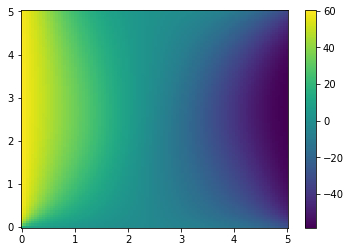

In [9]:
T=modelheat(nx2ny2)
tt=tf.reshape(T,(100,100))
c=plt.pcolormesh(nx, ny, tt) 
plt.colorbar(c)
plt.show()

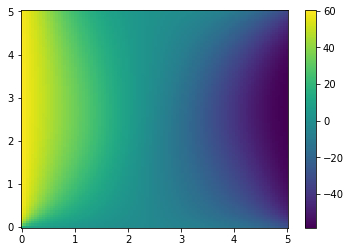

In [10]:
T=modelheat(nx2ny2)
tt=tf.reshape(T,(100,100))
c=plt.pcolormesh(nx, ny, tt) 
plt.colorbar(c)
plt.show()